In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive
 anomaly_detection_datasets	    models
'API Document.gdoc'		   'old file'
'arxiv insights'		    reaction_ciena
 Autoencoder.ipynb		    Res40000_157
 creditcard_fraud_detection.ipynb   Res40000_5
'Deep Learning'			    resourse.zip
 dev_test.npy			   'Resume for Research Engineer.gdoc'
 dev_train.npy			    Resume.gdoc
 French				    Untitled
 GAN				    X_test.npy
 Kylearn-pytorch		    X_train.npy
 Letter.gdoc			    y_test.npy
 logstrain	

In [0]:
import pandas as pd
import numpy as np


In [0]:
data = pd.read_csv('anomaly_detection_datasets/fraud_detection/creditcard.csv')

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Process time diff

In [0]:
data['time_diff'] = data.Time - data.Time.shift(1, fill_value=0)

In [7]:
data['time_diff'].value_counts()

0.0     160216
1.0     100059
2.0      15620
3.0       4156
4.0       1807
5.0        961
6.0        619
7.0        380
8.0        298
9.0        200
10.0       138
11.0        86
12.0        61
13.0        56
14.0        33
16.0        26
15.0        23
17.0        14
19.0        12
18.0         9
20.0         7
21.0         5
26.0         4
22.0         4
32.0         4
28.0         3
24.0         2
25.0         2
27.0         1
23.0         1
Name: time_diff, dtype: int64

### Encode Amount

### Log interval

### 0-1 -> 0, 1-10 -> 1, 10-100 -> 2 ...


In [8]:
data['log_amount'] = np.log10(data.Amount)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [0]:
data.loc[data['log_amount'] <= 0, 'log_amount'] = 0

In [0]:
data['log_amount'] = np.ceil(data['log_amount'])

In [11]:
data['log_amount'].value_counts()

2.0    128035
1.0     69772
3.0     53568
0.0     30492
4.0      2933
5.0         7
Name: log_amount, dtype: int64

### One-hot log_amount and use it as a meta feature

In [0]:
log_amount = data['log_amount'].astype(int)
meta = np.eye(log_amount.max()+1)[log_amount]

### split dataset

In [0]:
from sklearn.model_selection import train_test_split

In [14]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
X = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 
                                        'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
                                        'V13', 'V14', 'V15', 'V16', 'V17', 
                                        'V18', 'V19', 'V20', 'V21', 'V22', 
                                        'V23', 'V24', 'V25', 'V26', 'V27', 
                                        'V28', 'time_diff', 'Amount']]


In [0]:
X_train, X_test = train_test_split(X,
                                  test_size = 0.2, random_state = 42)

meta_train, meta_test = train_test_split(meta, test_size = 0.2, random_state = 42)
y_train, y_test = train_test_split(data['Class'], test_size = 0.2, random_state = 42)

### Save data

In [0]:
np.save('X_train.npy', X_train.values)
np.save( 'X_test.npy',X_test.values,)
np.save('dev_train.npy',meta_train)
np.save('dev_test.npy',meta_test)
np.save('y_train.npy',y_train.values.reshape([-1,1]) )
np.save( 'y_test.npy',y_test.values.reshape([-1,1]))

## Load model and train

In [0]:
import sys
sys.path.append('/content/drive/My Drive/Kylearn-pytorch')
from Dataloader.reactionattention import ReactionDataloader
from Models.reactionattention import ReactionModel_

In [0]:
dataloader = ReactionDataloader('', batch_size=1000, val_size=0.01)


In [20]:
model = ReactionModel_('models/ckpt', 'logs', dataloader, d_reactant=64, d_bottleneck=128, d_classifier=512, n_layers=6,
                       n_head=8, dropout=0.1, d_output=1,threshold=0.5, stack='ReactionAttention',
                       expansion_layer='LinearExpansion'
                       )

INFO: CUDA device exists


In [21]:
model.train(epoch=20, device='cuda', smoothing=False, save_mode='best')


Output hidden; open in https://colab.research.google.com to view.

In [0]:
model.load_model('models/ckpt-loss-0.2497633844614029')

In [31]:
pred, real = model.predict(dataloader.test_dataloader(),'cuda')



  - (Testing)   :   0%|          | 0/57 [00:00<?, ?it/s]

  - (Testing)   :   2%|▏         | 1/57 [00:00<00:17,  3.16it/s]

  - (Testing)   :   5%|▌         | 3/57 [00:00<00:12,  4.22it/s]

  - (Testing)   :  12%|█▏        | 7/57 [00:00<00:08,  5.71it/s]

  - (Testing)   :  18%|█▊        | 10/57 [00:00<00:06,  7.50it/s]

  - (Testing)   :  23%|██▎       | 13/57 [00:00<00:04,  9.40it/s]

  - (Testing)   :  28%|██▊       | 16/57 [00:00<00:03, 11.69it/s]

  - (Testing)   :  35%|███▌      | 20/57 [00:01<00:03, 12.14it/s]

  - (Testing)   :  44%|████▍     | 25/57 [00:01<00:02, 15.26it/s]

  - (Testing)   :  49%|████▉     | 28/57 [00:01<00:01, 17.21it/s]

  - (Testing)   :  54%|█████▍    | 31/57 [00:01<00:01, 19.15it/s]

  - (Testing)   :  61%|██████▏   | 35/57 [00:01<00:01, 21.83it/s]

  - (Testing)   :  68%|██████▊   | 39/57 [00:01<00:00, 24.06it/s]

  - (Testing)   :  74%|███████▎  | 42/57 [00:01<00:00, 24.84it/s]

  - (Testing)   :  79%|███████▉  | 45/57 [00:02<00:00, 25.88it/s]

  - (

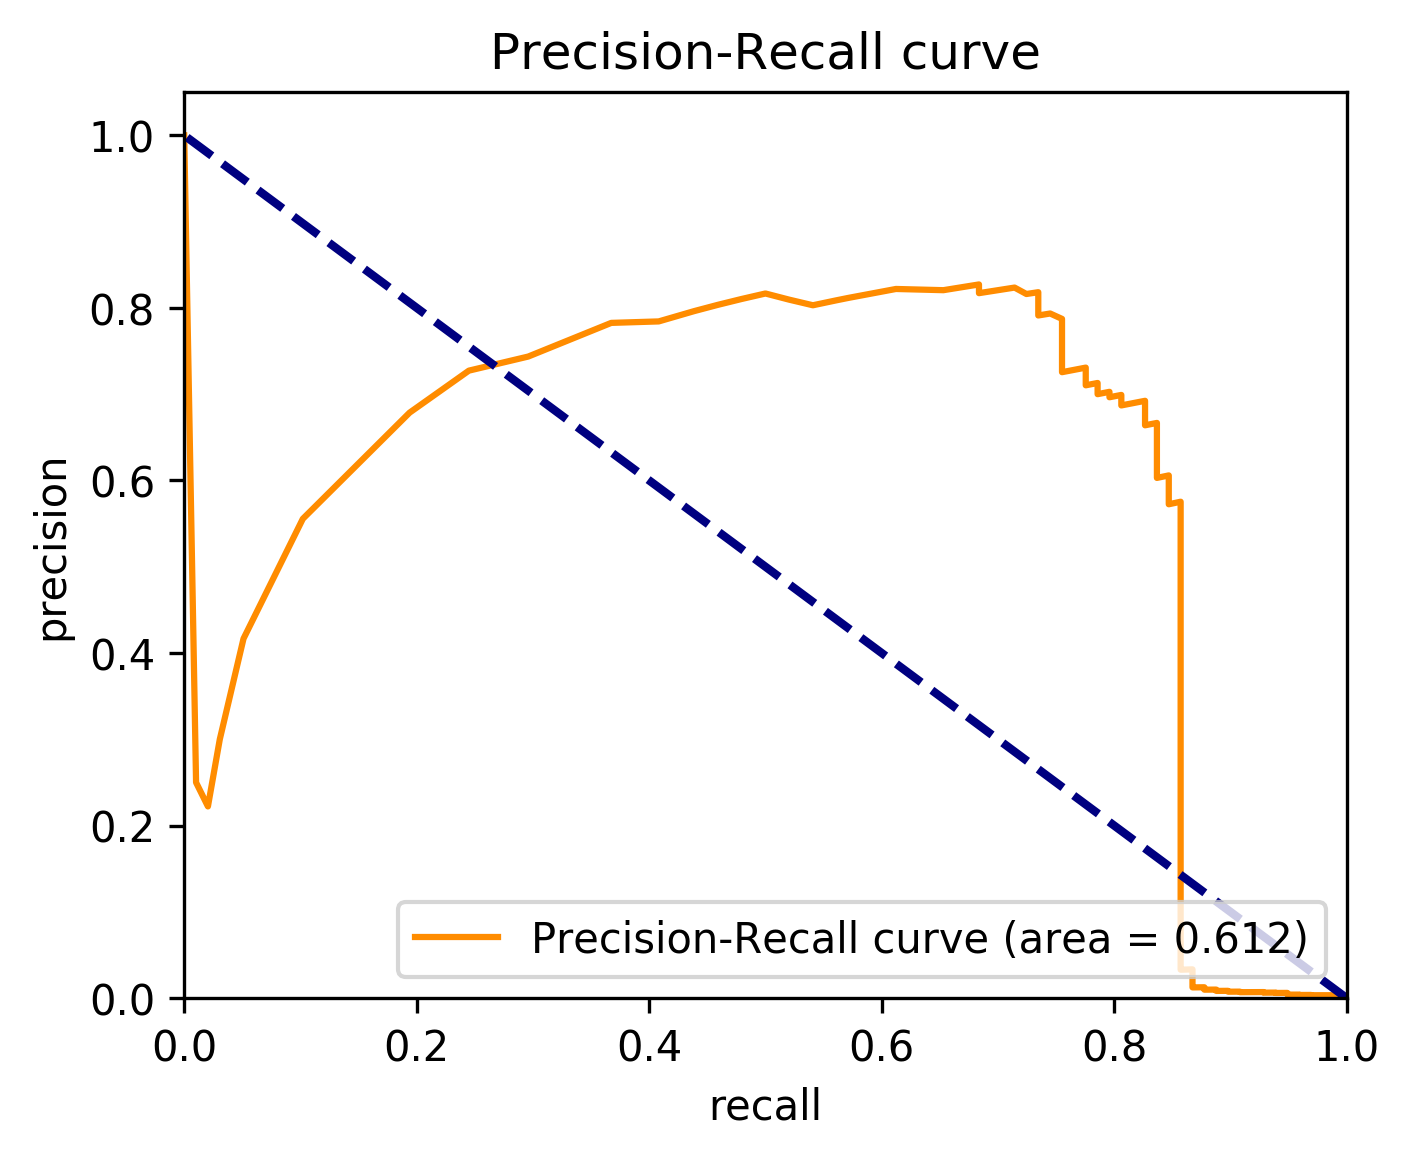

In [32]:
from utils.plot_curves import precision_recall, plot_pr_curve

area, precisions, recalls, thresholds = precision_recall(pred, real)
plot_pr_curve(recalls, precisions, auc=area)

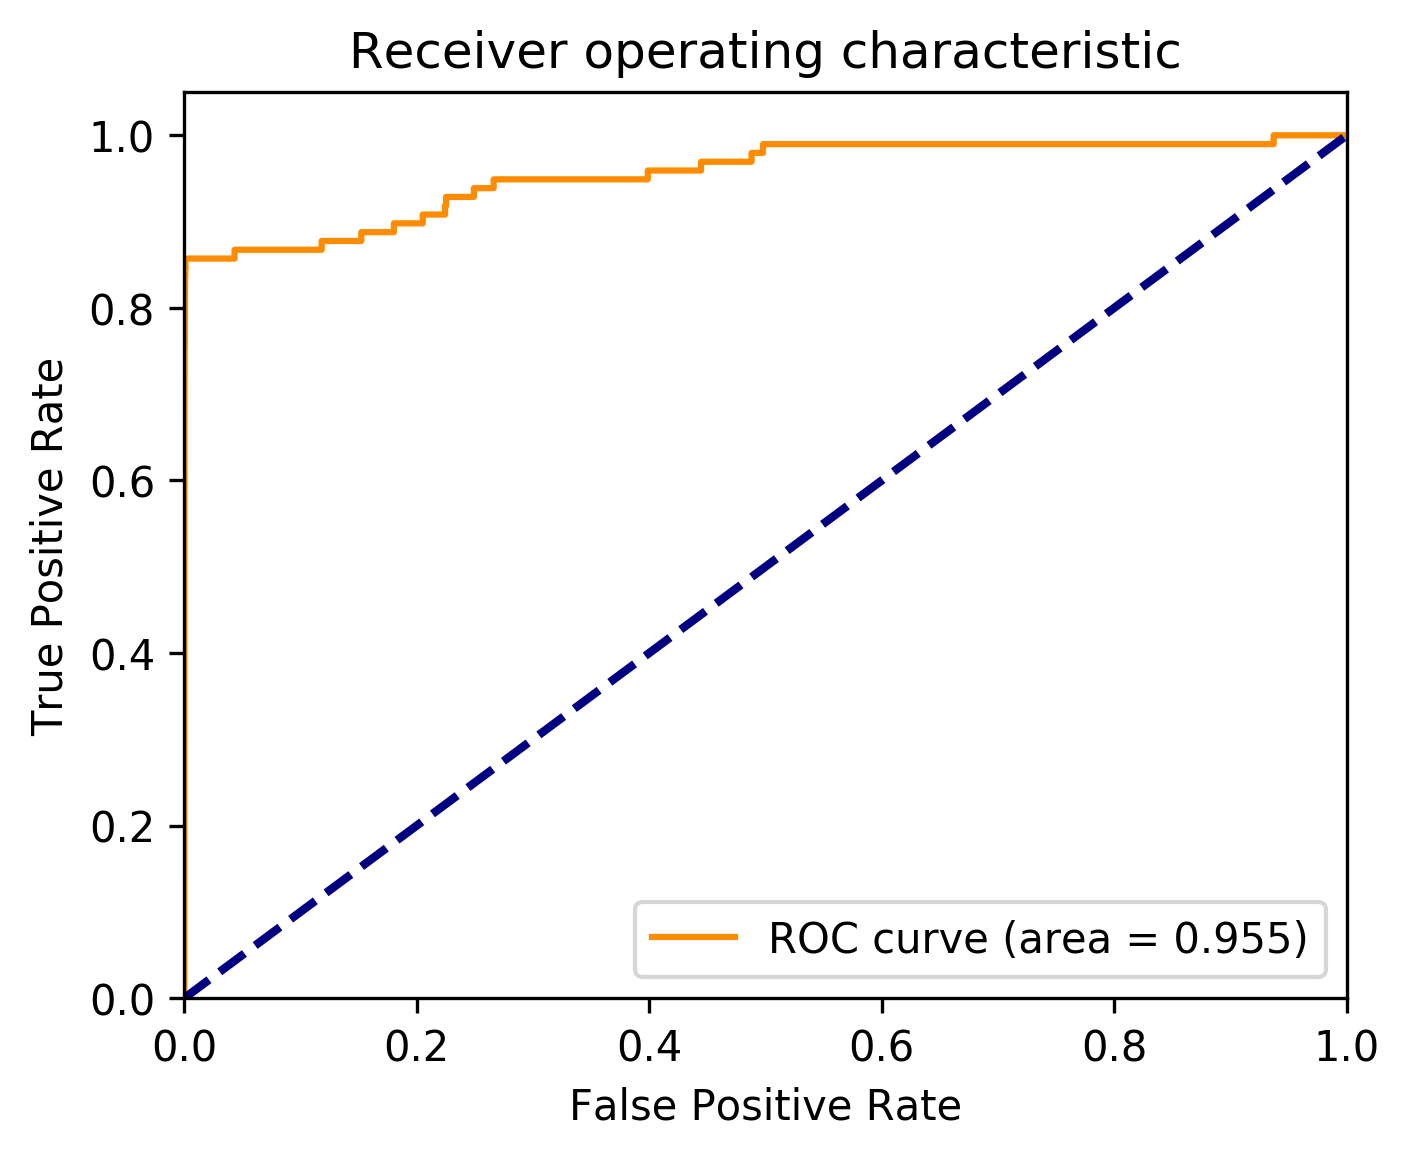

In [35]:
from utils.plot_curves import auc_roc, plot_roc_curve

auc, fprs, tprs, thresholds = auc_roc(pred, real)
plot_roc_curve(fprs, tprs, auc, x_axis = 1)